Here we will be working on a Data set from Kaggle website
as I live in Seattle Washington I thought that may be a pretty
nice information to be aware. Anyways we will explore the data set
probably do some cleaning if necesary.
the focus here is just to explore Linear regression. In my humble opinion super awesome.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from statsmodels.tools.eval_measures import mse, rmse
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Kaggle/Kaggle_dataset/archive (5).zip (Unzipped Files)/kc_house_data.csv')

EDA

In [ ]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Before we keep moving forward lets take a look of the Features

In [ ]:
# I personally like to look like these, perhaps not that much efficient in big big data, but
# here gives a good view for any misterious caracters.
for col in df.columns:
  print(df[col].unique())

[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]
['20141013T000000' '20141209T000000' '20150225T000000' '20150218T000000'
 '20140512T000000' '20140627T000000' '20150115T000000' '20150415T000000'
 '20150312T000000' '20150403T000000' '20140527T000000' '20140528T000000'
 '20141007T000000' '20150124T000000' '20140731T000000' '20140529T000000'
 '20141205T000000' '20150424T000000' '20140514T000000' '20140826T000000'
 '20140703T000000' '20140516T000000' '20141120T000000' '20141103T000000'
 '20140626T000000' '20141201T000000' '20140624T000000' '20150302T000000'
 '20141110T000000' '20141203T000000' '20140613T000000' '20141230T000000'
 '20150213T000000' '20140620T000000' '20140715T000000' '20140811T000000'
 '20140707T000000' '20141028T000000' '20140729T000000' '20140718T000000'
 '20150325T000000' '20140716T000000' '20150428T000000' '20150311T000000'
 '20140916T000000' '20150217T000000' '20141231T000000' '20150205T000000'
 '20150303T000000' '20140819T000000' '20150407T00000

In [ ]:
## Exploring for missing values 
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sqft_lot15,0,0.0
view,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0


This Data set is pretty clean and awesom, here we will be looking into the distribution of the sales prices. 
as the saleprice does not seem to be normally distributed we
will latter use np.log1p on price feature to help us 
understand the relationship better.

In [ ]:
# looking for coorelated features
np.abs(df.corr().loc["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

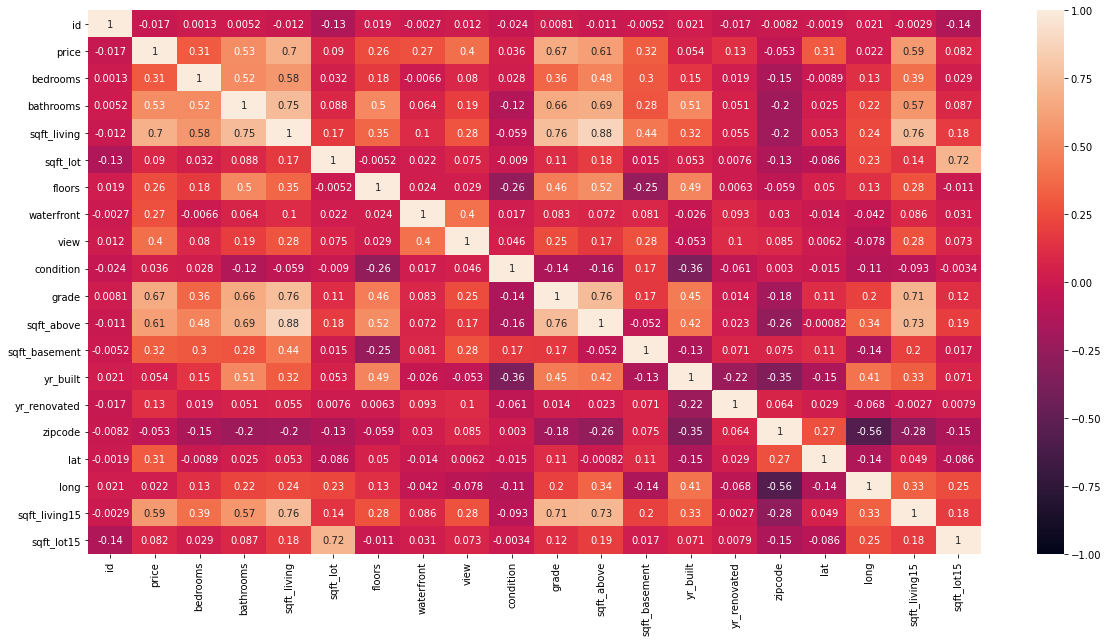

In [ ]:
#here plotting a heat map to have a more visual view of the correlacion between columns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=+1)

Splitting our Data, then splitting again
and saving some of our data to test.
for the preliminary model we will shoot for the 
coorelated variables, and start from there :)


In [ ]:
y =  np.log1p(df['price'])
X = df.loc[:,  df.columns.isin(['price',          
                                'sqft_living',
                                'grade',
                                'sqft_above',
                                'sqft_living15',
                                'bathrooms',
                                'view',
                                'sqft_basement',
                                'bedrooms',
                                'lat',
                                'waterfront',
                                'floors',
                                'yr_renovated',
                                'sqft_lot',
                                'sqft_lot15',
                                'yr_built',
                                'zipcode',         
                                'condition',      
                                'long',             
                                'id'])]

In [ ]:
## Now, split your data into train and test sets.
## 20% of the data resides in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

Defining our model

In [ ]:
####  MODELO NUMERO UNO
####  OLS
lrm = LinearRegression(fit_intercept=False , normalize=False, copy_X=True, n_jobs=22)

lrm.fit(X, y)

# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.8797383325161601
-----Test set statistics-----
R-squared of the model in test set is: 0.8611746721672054
Mean absolute error of the prediction is: 0.13482331422502036
Mean squared error of the prediction is: 0.040030202639236394
Root mean squared error of the prediction is: 0.20007549235035357
Mean absolute percentage error of the prediction is: 1.0332997908087374


In [ ]:
# Here the coeficients per each of the variables. If we need to make a decision :)
lrm.coef_

array([ 1.84804659e-12,  8.50175675e-07,  1.77709125e-02,  3.42758053e-02,
        2.20141215e-06,  3.63595162e-07,  7.17308159e-02, -1.24538422e-01,
        1.60818063e-02,  3.90230120e-02,  7.79237424e-02, -2.08290735e-05,
        2.30304857e-05, -1.27704268e-03,  1.89782297e-05, -2.56225978e-04,
        8.89041551e-01,  2.58918416e-02,  7.78566433e-05,  7.32456265e-08])

Not that Awesome, but sometimes it goes this way, 
not too much room to move optimizing the model itself, 
lets see how do we do with other linear Classifiers.
ALSO :)
Our Linear regression model explain 87% of the variation in price is explained by the seleced variables.
